<a href="https://colab.research.google.com/github/KipeGithub/Referensi2-QP-ML-Dadang-/blob/main/code/QP_Reference_IV_Prediksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Memanggil data**

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

test_y = pd.read_csv('/content/drive/MyDrive/Data_gabung/y_test_70.csv')
test_x = pd.read_csv('/content/drive/MyDrive/Data_gabung/x_test_70.csv')
# yy = pd.read_csv('/content/drive/MyDrive/Data_gabung/y_testes.csv')
# xx = pd.read_csv('/content/drive/MyDrive/Data_gabung/x_testes.csv')

Mounted at /content/drive


In [ ]:
import pickle

with open('/content/drive/MyDrive/Data_gabung/export_data.pkl','rb') as r:
  data_test = pickle.load(r)

**Memanggil Model**

In [ ]:
import pickle

with open('/content/drive/MyDrive/Data_gabung/model_pickle','rb') as r:
  tes = pickle.load(r)

In [ ]:
y_pred = tes.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


**evaluasi convusion matrix**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

    negative       0.75      0.18      0.29       355
     neutral       0.40      0.10      0.16       256
    positive       0.79      0.98      0.87      1974

    accuracy                           0.78      2585
   macro avg       0.65      0.42      0.44      2585
weighted avg       0.75      0.78      0.72      2585



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_y, y_pred, average='macro')
recall = recall_score(test_y, y_pred, average='macro')
f1 = f1_score(test_y, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.6468801313628899
Recall: 0.41823705976996733
F1-score: 0.44082636751860105


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


<Axes: >

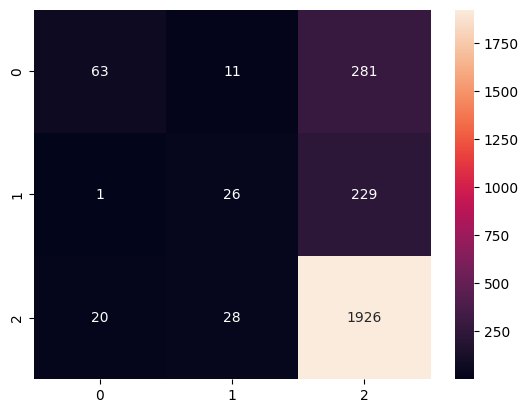

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
sns.heatmap(confusion_matrix(test_y,y_pred),annot=True,fmt='.4g')

In [ ]:
results = pd.DataFrame({'Provinsi': data_test['Provinsi'], 'Kota': data_test['Kota'],'Objek Wisata': data_test['Objek Wisata'], 'Review': data_test['Review'], 'Review_clean': data_test['Review_clean'], 'Date': data_test['Date'], 'Label': y_pred})

results.to_excel('/content/drive/MyDrive/Data_gabung/hasil.xlsx', index=False)
results.to_csv('/content/drive/MyDrive/Data_gabung/hasil.csv', index=False)

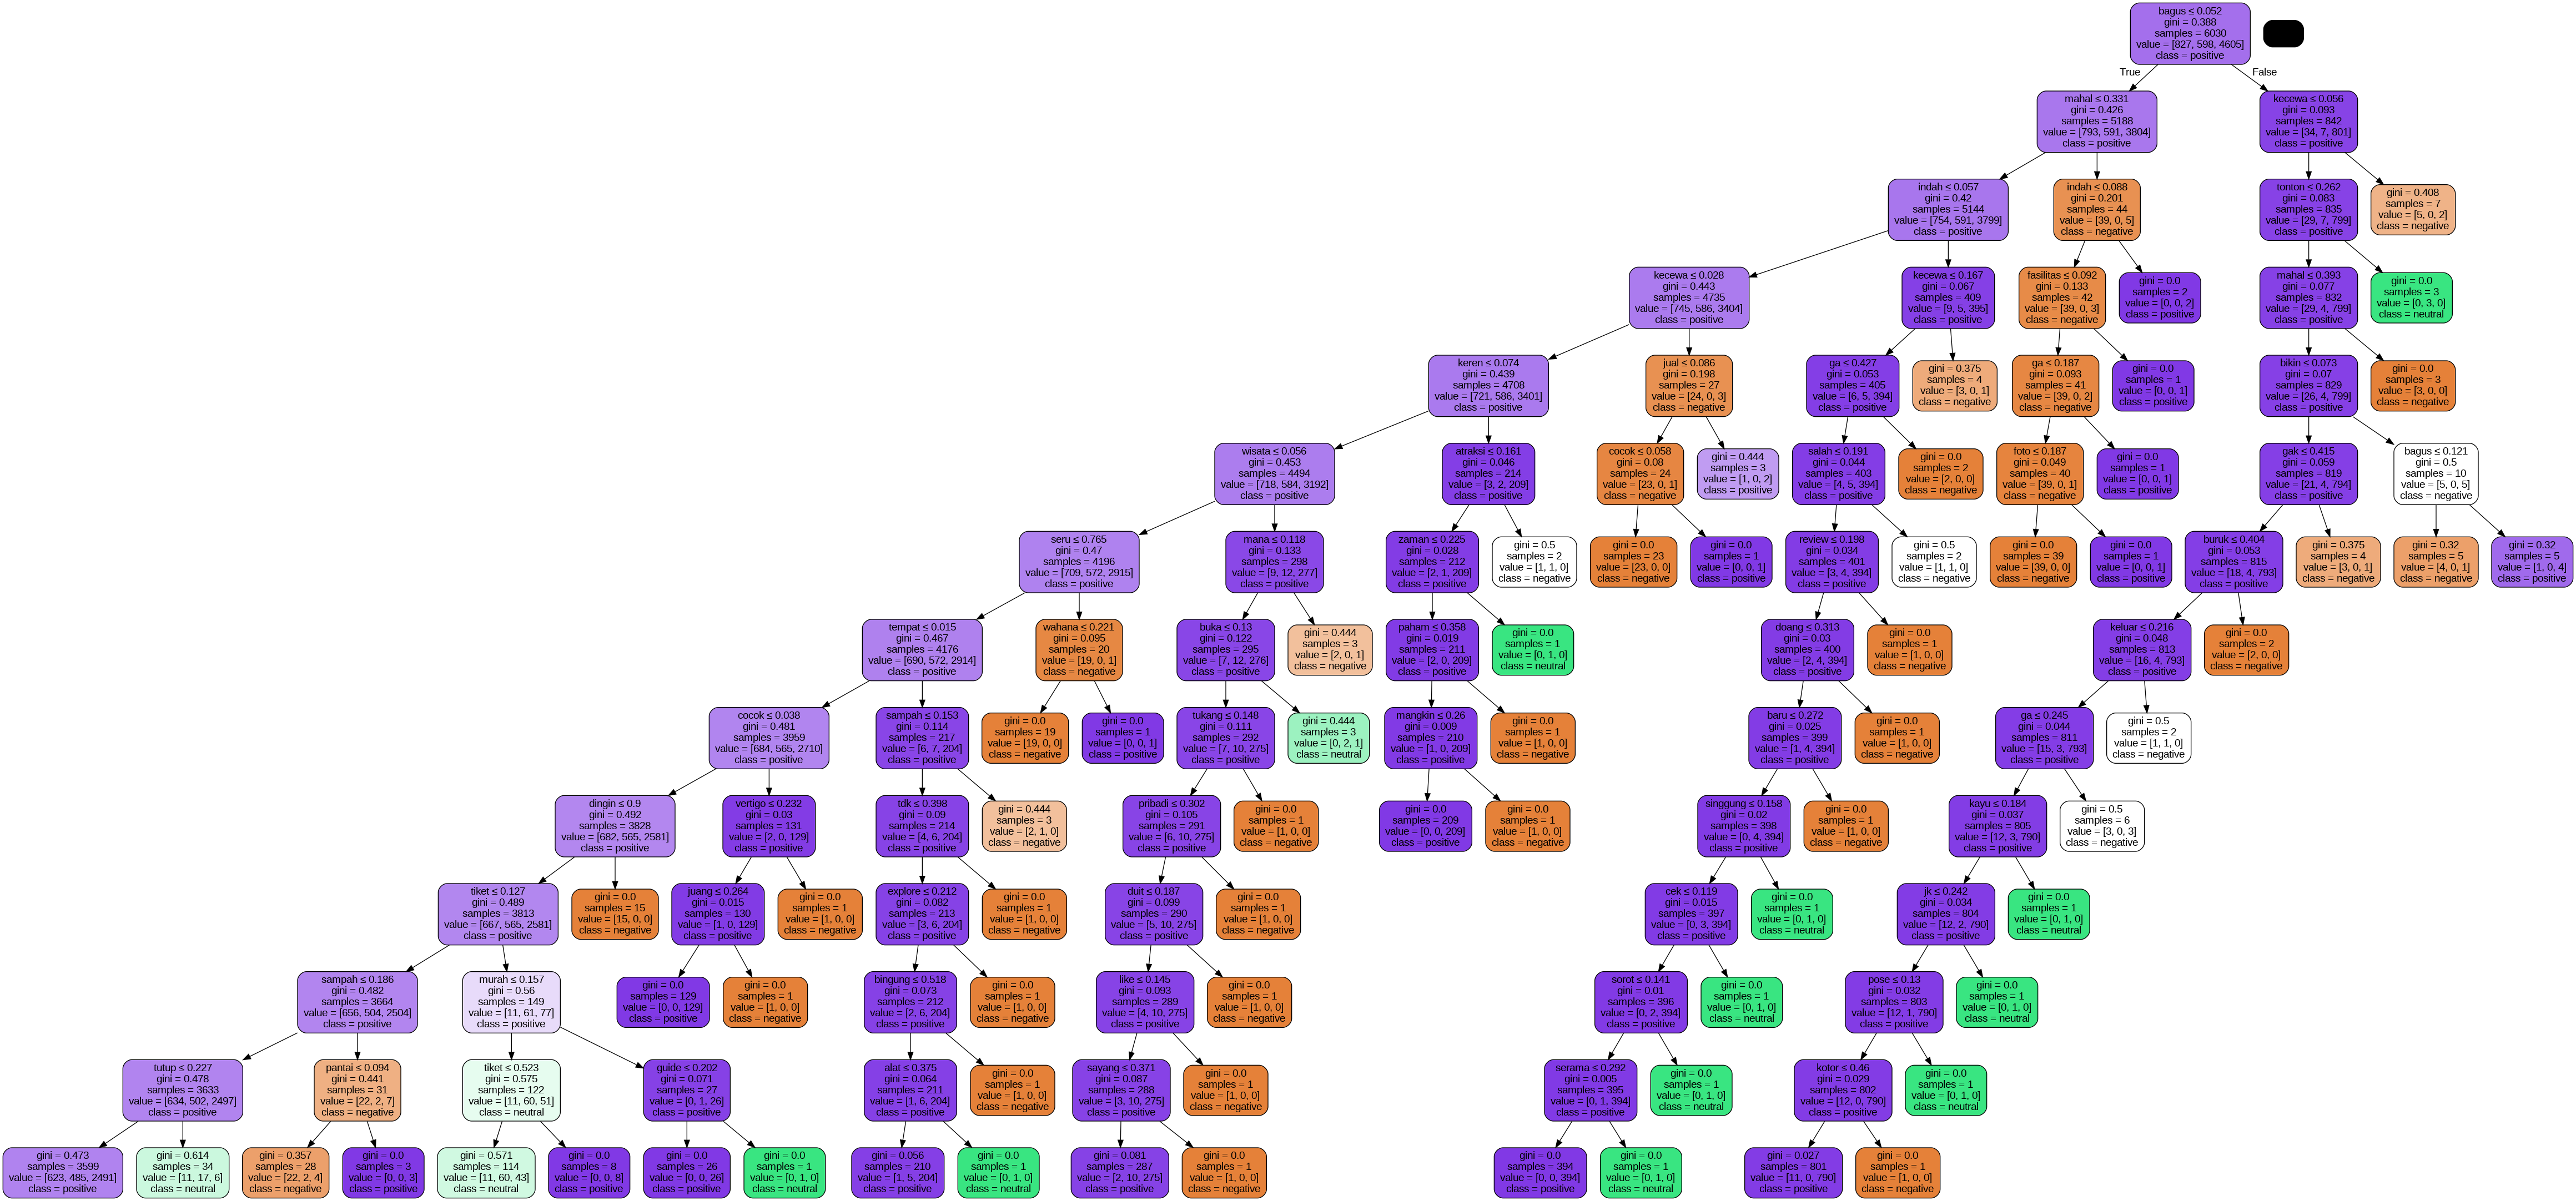

In [ ]:
import graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image
dot_data = tree.export_graphviz(tes, out_file=None,
                                feature_names=test_x.columns,
                                class_names=['negative', 'neutral','positive'],
                                filled=True, rounded=True,
                                special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris_tree.png')
Image(graph.create_png())

In [ ]:
# graph.write_png('/content/drive/MyDrive/Data_gabung/tree.png')